In [48]:
import pandas as pd

In [49]:
gardiner_df = pd.read_csv("../../csv/gardiner_count_flow_weather_encoded_v2.csv.zip", index_col=False)
gardiner_df = gardiner_df.drop(columns=["Unnamed: 0"])
gardiner_df["datetime_bin"] = pd.to_datetime(gardiner_df["datetime_bin"], utc=True)

In [50]:
gardiner_df_road_closure_03 = gardiner_df[gardiner_df["roadClosure"] == 0.000000]
gardiner_df_road_closure_13 = gardiner_df[gardiner_df["roadClosure"] == 1 / 3]
gardiner_df_road_closure_23 = gardiner_df[gardiner_df["roadClosure"] == 2 / 3]
gardiner_df_road_closure_33 = gardiner_df[gardiner_df["roadClosure"] == 1.000000]

In [51]:
print(len(gardiner_df_road_closure_03))
print(len(gardiner_df_road_closure_13))
print(len(gardiner_df_road_closure_23))
print(len(gardiner_df_road_closure_33))

14000
4
2
6


Attribute roadClosure is biased towards the road not being closed.

In [52]:
gardiner_df = gardiner_df.drop(columns=["roadClosure"])
gardiner_df

,datetime_bin,volume_15min,latitude,longitude,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,coordinates,visibility,temperature,humidity,windSpeed,windDegree,rain1h,snow1h,weather,cloudsAll,E,W
0,2022-08-11 15:00:00+00:00,160,43.638046,-79.396634,94.0,94.0,297.0,297.0,"[{'latitude': 43.681009250673604, 'longitude':...",10000.0,22.663333,67.000000,4.066667,338.0,0.000000,0.0,800,0,0,1
1,2022-08-11 15:00:00+00:00,146,43.637929,-79.396597,94.0,94.0,297.0,297.0,"[{'latitude': 43.681009250673604, 'longitude':...",10000.0,22.663333,67.000000,4.066667,338.0,0.000000,0.0,800,0,1,0
2,2022-08-11 15:15:00+00:00,946,43.638046,-79.396634,94.0,94.0,297.0,297.0,"[{'latitude': 43.681009250673604, 'longitude':...",10000.0,23.216667,62.000000,4.016667,118.0,0.000000,0.0,800,0,0,1
3,2022-08-11 15:15:00+00:00,809,43.637929,-79.396597,94.0,94.0,297.0,297.0,"[{'latitude': 43.681009250673604, 'longitude':...",10000.0,23.216667,62.000000,4.016667,118.0,0.000000,0.0,800,0,1,0
4,2022-08-11 15:30:00+00:00,1018,43.638046,-79.396634,94.0,94.0,297.0,297.0,"[{'latitude': 43.681009250673604, 'longitude':...",10000.0,23.606667,58.666667,6.690000,330.0,0.000000,0.0,800,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14007,2022-12-31 16:00:00+00:00,817,43.637929,-79.396597,93.0,93.0,300.0,300.0,"[{'latitude': 43.681009250673604, 'longitude':...",2414.0,7.490000,96.333333,3.943333,70.0,0.853333,0.0,501,100,1,0
14008,2022-12-31 16:15:00+00:00,777,43.638046,-79.396634,93.0,93.0,300.0,300.0,"[{'latitude': 43.681009250673604, 'longitude':...",754.0,7.800000,95.333333,1.790000,134.0,0.360000,0.0,500,100,0,1
14009,2022-12-31 16:15:00+00:00,769,43.637929,-79.396597,93.0,93.0,300.0,300.0,"[{'latitude': 43.681009250673604, 'longitude':...",754.0,7.800000,95.333333,1.790000,134.0,0.360000,0.0,500,100,1,0
14010,2022-12-31 16:30:00+00:00,262,43.638046,-79.396634,93.0,93.0,300.0,300.0,"[{'latitude': 43.681009250673604, 'longitude':...",754.0,7.910000,95.000000,1.790000,134.0,0.140000,0.0,500,100,0,1


Travel time and speed are mean values of an 8km stretch going from north DVP all the way down to Gardiner Expy
The zoom parameter doesn't influence much since it's just for rendering maps

In [53]:
gardiner_df_stat_analysis = gardiner_df.groupby("datetime_bin").describe().reset_index()

In [54]:
gardiner_df_stat_analysis.to_csv("../../csv/gardiner_df_stat_analysis.csv.zip", index=False, compression="zip")

In [55]:
gardiner_mean = gardiner_df.groupby("datetime_bin").mean().reset_index()
gardiner_ebnd = gardiner_df[gardiner_df["E"] == 1]
gardiner_wbnd = gardiner_df[gardiner_df["W"] == 1]

In [56]:
gardiner_ebnd_aug = gardiner_ebnd[gardiner_ebnd["datetime_bin"].dt.month == 8]
gardiner_wbnd_aug = gardiner_wbnd[gardiner_wbnd["datetime_bin"].dt.month == 8]
gardiner_mean_aug = gardiner_mean[gardiner_mean["datetime_bin"].dt.month == 8]

gardiner_ebnd_sep = gardiner_ebnd[gardiner_ebnd["datetime_bin"].dt.month == 9]
gardiner_wbnd_sep = gardiner_wbnd[gardiner_wbnd["datetime_bin"].dt.month == 9]
gardiner_mean_sep = gardiner_mean[gardiner_mean["datetime_bin"].dt.month == 9]

gardiner_ebnd_oct = gardiner_ebnd[gardiner_ebnd["datetime_bin"].dt.month == 10]
gardiner_wbnd_oct = gardiner_wbnd[gardiner_wbnd["datetime_bin"].dt.month == 10]
gardiner_mean_oct = gardiner_mean[gardiner_mean["datetime_bin"].dt.month == 10]

gardiner_ebnd_nov = gardiner_ebnd[gardiner_ebnd["datetime_bin"].dt.month == 11]
gardiner_wbnd_nov = gardiner_wbnd[gardiner_wbnd["datetime_bin"].dt.month == 11]
gardiner_mean_nov = gardiner_mean[gardiner_mean["datetime_bin"].dt.month == 11]

gardiner_ebnd_dec = gardiner_ebnd[gardiner_ebnd["datetime_bin"].dt.month == 12]
gardiner_wbnd_dec = gardiner_wbnd[gardiner_wbnd["datetime_bin"].dt.month == 12]
gardiner_mean_dec = gardiner_mean[gardiner_mean["datetime_bin"].dt.month == 12]

In [57]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


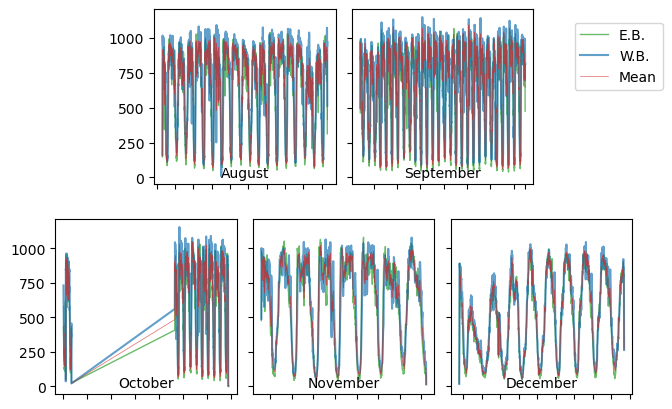

In [58]:
fig = plt.figure(figsize=(10, 5))
spec = gridspec.GridSpec(ncols=8, nrows=2, figure=fig)

aug_ax = fig.add_subplot(spec[0, 2:4])
plt.setp(aug_ax.get_xticklabels(), visible=False)

sep_ax = fig.add_subplot(spec[0, 4:6], sharey=aug_ax)
plt.setp(sep_ax.get_xticklabels(), visible=False)
plt.setp(sep_ax.get_yticklabels(), visible=False)

oct_ax = fig.add_subplot(spec[1, 1:3])
plt.setp(oct_ax.get_xticklabels(), visible=False)

nov_ax = fig.add_subplot(spec[1, 3:5], sharey=oct_ax)
plt.setp(nov_ax.get_xticklabels(), visible=False)
plt.setp(nov_ax.get_yticklabels(), visible=False)

dec_ax = fig.add_subplot(spec[1, 5:7], sharey=oct_ax)
plt.setp(dec_ax.get_xticklabels(), visible=False)
plt.setp(dec_ax.get_yticklabels(), visible=False)

aug_ax.set_title("August", y=-0.01, fontsize=10)
aug_ax.plot(gardiner_ebnd_aug["datetime_bin"], gardiner_ebnd_aug["volume_15min"], linewidth=1, label="E.B.",
            color="tab:green",
            alpha=0.7)
aug_ax.plot(gardiner_wbnd_aug["datetime_bin"], gardiner_wbnd_aug["volume_15min"], linewidth=1.5, label="W.B.",
            color="tab:blue", alpha=0.7)
aug_ax.plot(gardiner_mean_aug["datetime_bin"], gardiner_mean_aug["volume_15min"], linewidth=0.5, label="Mean",
            color="tab:red",
            alpha=0.7)

sep_ax.set_title("September", y=-0.01, fontsize=10)
sep_ax.plot(gardiner_ebnd_sep["datetime_bin"], gardiner_ebnd_sep["volume_15min"], linewidth=1, label="E.B.",
            color="tab:green",
            alpha=0.7)
sep_ax.plot(gardiner_wbnd_sep["datetime_bin"], gardiner_wbnd_sep["volume_15min"], linewidth=1.5, label="W.B.",
            color="tab:blue", alpha=0.7)
sep_ax.plot(gardiner_mean_sep["datetime_bin"], gardiner_mean_sep["volume_15min"], linewidth=0.5, label="Mean",
            color="tab:red",
            alpha=0.7)
sep_ax.legend(loc="lower right", bbox_to_anchor=(1.75, 0.5))

oct_ax.set_title("October", y=-0.01, fontsize=10)
oct_ax.plot(gardiner_ebnd_oct["datetime_bin"], gardiner_ebnd_oct["volume_15min"], linewidth=1, label="E.B.",
            color="tab:green",
            alpha=0.7)
oct_ax.plot(gardiner_wbnd_oct["datetime_bin"], gardiner_wbnd_oct["volume_15min"], linewidth=1.5, label="W.B.",
            color="tab:blue", alpha=0.7)
oct_ax.plot(gardiner_mean_oct["datetime_bin"], gardiner_mean_oct["volume_15min"], linewidth=0.5, label="Mean",
            color="tab:red",
            alpha=0.7)

nov_ax.set_title("November", y=-0.01, fontsize=10)
nov_ax.plot(gardiner_ebnd_nov["datetime_bin"], gardiner_ebnd_nov["volume_15min"], linewidth=1, label="E.B.",
            color="tab:green",
            alpha=0.7)
nov_ax.plot(gardiner_wbnd_nov["datetime_bin"], gardiner_wbnd_nov["volume_15min"], linewidth=1.5, label="W.B.",
            color="tab:blue", alpha=0.7)
nov_ax.plot(gardiner_mean_nov["datetime_bin"], gardiner_mean_nov["volume_15min"], linewidth=0.5, label="Mean",
            color="tab:red",
            alpha=0.7)

dec_ax.set_title("December", y=-0.01, fontsize=10)
dec_ax.plot(gardiner_ebnd_dec["datetime_bin"], gardiner_ebnd_dec["volume_15min"], linewidth=1, label="E.B.",
            color="tab:green",
            alpha=0.7)
dec_ax.plot(gardiner_wbnd_dec["datetime_bin"], gardiner_wbnd_dec["volume_15min"], linewidth=1.5, label="W.B.",
            color="tab:blue", alpha=0.7)
dec_ax.plot(gardiner_mean_dec["datetime_bin"], gardiner_mean_dec["volume_15min"], linewidth=0.5, label="Mean",
            color="tab:red",
            alpha=0.7)

plt.savefig("../../img/010_gardiner_volumes.eps", format="eps", bbox_inches="tight")
plt.savefig("../../img/010_gardiner_volumes.png", bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


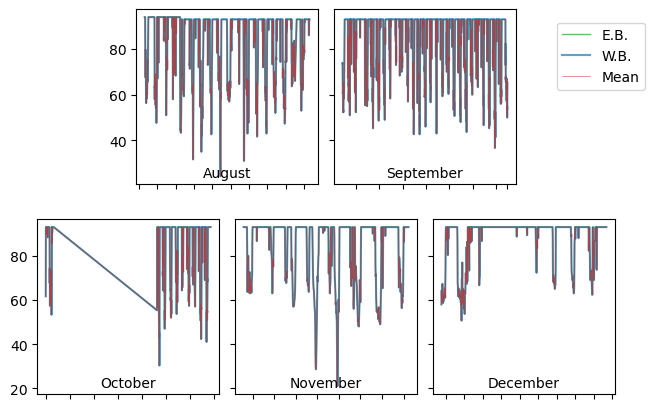

In [59]:
fig = plt.figure(figsize=(10, 5))
spec = gridspec.GridSpec(ncols=8, nrows=2, figure=fig)

aug_ax = fig.add_subplot(spec[0, 2:4])
plt.setp(aug_ax.get_xticklabels(), visible=False)

sep_ax = fig.add_subplot(spec[0, 4:6], sharey=aug_ax)
plt.setp(sep_ax.get_xticklabels(), visible=False)
plt.setp(sep_ax.get_yticklabels(), visible=False)

oct_ax = fig.add_subplot(spec[1, 1:3])
plt.setp(oct_ax.get_xticklabels(), visible=False)

nov_ax = fig.add_subplot(spec[1, 3:5], sharey=oct_ax)
plt.setp(nov_ax.get_xticklabels(), visible=False)
plt.setp(nov_ax.get_yticklabels(), visible=False)

dec_ax = fig.add_subplot(spec[1, 5:7], sharey=oct_ax)
plt.setp(dec_ax.get_xticklabels(), visible=False)
plt.setp(dec_ax.get_yticklabels(), visible=False)

aug_ax.set_title("August", y=-0.01, fontsize=10)
aug_ax.plot(gardiner_ebnd_aug["datetime_bin"], gardiner_ebnd_aug["currentSpeed"], linewidth=1, label="E.B.",
            color="tab:green",
            alpha=0.7)
aug_ax.plot(gardiner_wbnd_aug["datetime_bin"], gardiner_wbnd_aug["currentSpeed"], linewidth=1.5, label="W.B.",
            color="tab:blue", alpha=0.7)
aug_ax.plot(gardiner_mean_aug["datetime_bin"], gardiner_mean_aug["currentSpeed"], linewidth=0.5, label="Mean",
            color="tab:red",
            alpha=0.7)

sep_ax.set_title("September", y=-0.01, fontsize=10)
sep_ax.plot(gardiner_ebnd_sep["datetime_bin"], gardiner_ebnd_sep["currentSpeed"], linewidth=1, label="E.B.",
            color="tab:green",
            alpha=0.7)
sep_ax.plot(gardiner_wbnd_sep["datetime_bin"], gardiner_wbnd_sep["currentSpeed"], linewidth=1.5, label="W.B.",
            color="tab:blue", alpha=0.7)
sep_ax.plot(gardiner_mean_sep["datetime_bin"], gardiner_mean_sep["currentSpeed"], linewidth=0.5, label="Mean",
            color="tab:red",
            alpha=0.7)
sep_ax.legend(loc="lower right", bbox_to_anchor=(1.75, 0.5))

oct_ax.set_title("October", y=-0.01, fontsize=10)
oct_ax.plot(gardiner_ebnd_oct["datetime_bin"], gardiner_ebnd_oct["currentSpeed"], linewidth=1, label="E.B.",
            color="tab:green",
            alpha=0.7)
oct_ax.plot(gardiner_wbnd_oct["datetime_bin"], gardiner_wbnd_oct["currentSpeed"], linewidth=1.5, label="W.B.",
            color="tab:blue", alpha=0.7)
oct_ax.plot(gardiner_mean_oct["datetime_bin"], gardiner_mean_oct["currentSpeed"], linewidth=0.5, label="Mean",
            color="tab:red",
            alpha=0.7)

nov_ax.set_title("November", y=-0.01, fontsize=10)
nov_ax.plot(gardiner_ebnd_nov["datetime_bin"], gardiner_ebnd_nov["currentSpeed"], linewidth=1, label="E.B.",
            color="tab:green",
            alpha=0.7)
nov_ax.plot(gardiner_wbnd_nov["datetime_bin"], gardiner_wbnd_nov["currentSpeed"], linewidth=1.5, label="W.B.",
            color="tab:blue", alpha=0.7)
nov_ax.plot(gardiner_mean_nov["datetime_bin"], gardiner_mean_nov["currentSpeed"], linewidth=0.5, label="Mean",
            color="tab:red",
            alpha=0.7)

dec_ax.set_title("December", y=-0.01, fontsize=10)
dec_ax.plot(gardiner_ebnd_dec["datetime_bin"], gardiner_ebnd_dec["currentSpeed"], linewidth=1, label="E.B.",
            color="tab:green",
            alpha=0.7)
dec_ax.plot(gardiner_wbnd_dec["datetime_bin"], gardiner_wbnd_dec["currentSpeed"], linewidth=1.5, label="W.B.",
            color="tab:blue", alpha=0.7)
dec_ax.plot(gardiner_mean_dec["datetime_bin"], gardiner_mean_dec["currentSpeed"], linewidth=0.5, label="Mean",
            color="tab:red",
            alpha=0.7)

plt.savefig("../../img/010_gardiner_current_speed.eps", format="eps", bbox_inches="tight")
plt.savefig("../../img/010_gardiner_current_speed.png", bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


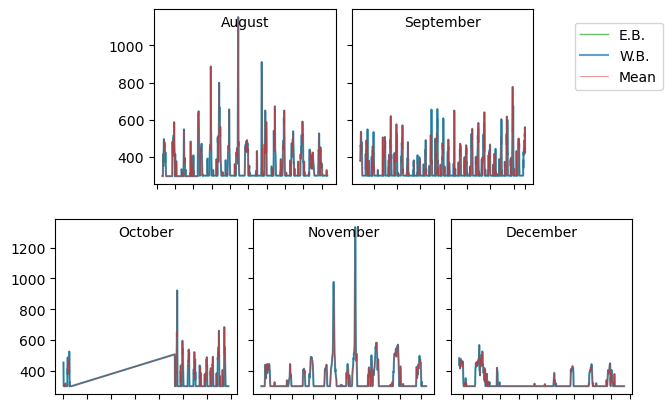

In [60]:
fig = plt.figure(figsize=(10, 5))
spec = gridspec.GridSpec(ncols=8, nrows=2, figure=fig)

aug_ax = fig.add_subplot(spec[0, 2:4])
plt.setp(aug_ax.get_xticklabels(), visible=False)

sep_ax = fig.add_subplot(spec[0, 4:6], sharey=aug_ax)
plt.setp(sep_ax.get_xticklabels(), visible=False)
plt.setp(sep_ax.get_yticklabels(), visible=False)

oct_ax = fig.add_subplot(spec[1, 1:3])
plt.setp(oct_ax.get_xticklabels(), visible=False)

nov_ax = fig.add_subplot(spec[1, 3:5], sharey=oct_ax)
plt.setp(nov_ax.get_xticklabels(), visible=False)
plt.setp(nov_ax.get_yticklabels(), visible=False)

dec_ax = fig.add_subplot(spec[1, 5:7], sharey=oct_ax)
plt.setp(dec_ax.get_xticklabels(), visible=False)
plt.setp(dec_ax.get_yticklabels(), visible=False)

aug_ax.set_title("August", pad=-12, fontsize=10)
aug_ax.plot(gardiner_ebnd_aug["datetime_bin"], gardiner_ebnd_aug["currentTravelTime"], linewidth=1, label="E.B.",
            color="tab:green",
            alpha=0.7)
aug_ax.plot(gardiner_wbnd_aug["datetime_bin"], gardiner_wbnd_aug["currentTravelTime"], linewidth=1.5, label="W.B.",
            color="tab:blue", alpha=0.7)
aug_ax.plot(gardiner_mean_aug["datetime_bin"], gardiner_mean_aug["currentTravelTime"], linewidth=0.5, label="Mean",
            color="tab:red",
            alpha=0.7)

sep_ax.set_title("September", pad=-12, fontsize=10)
sep_ax.plot(gardiner_ebnd_sep["datetime_bin"], gardiner_ebnd_sep["currentTravelTime"], linewidth=1, label="E.B.",
            color="tab:green",
            alpha=0.7)
sep_ax.plot(gardiner_wbnd_sep["datetime_bin"], gardiner_wbnd_sep["currentTravelTime"], linewidth=1.5, label="W.B.",
            color="tab:blue", alpha=0.7)
sep_ax.plot(gardiner_mean_sep["datetime_bin"], gardiner_mean_sep["currentTravelTime"], linewidth=0.5, label="Mean",
            color="tab:red",
            alpha=0.7)
sep_ax.legend(loc="lower right", bbox_to_anchor=(1.75, 0.5))

oct_ax.set_title("October", pad=-12, fontsize=10)
oct_ax.plot(gardiner_ebnd_oct["datetime_bin"], gardiner_ebnd_oct["currentTravelTime"], linewidth=1, label="E.B.",
            color="tab:green",
            alpha=0.7)
oct_ax.plot(gardiner_wbnd_oct["datetime_bin"], gardiner_wbnd_oct["currentTravelTime"], linewidth=1.5, label="W.B.",
            color="tab:blue", alpha=0.7)
oct_ax.plot(gardiner_mean_oct["datetime_bin"], gardiner_mean_oct["currentTravelTime"], linewidth=0.5, label="Mean",
            color="tab:red",
            alpha=0.7)

nov_ax.set_title("November", pad=-12, fontsize=10)
nov_ax.plot(gardiner_ebnd_nov["datetime_bin"], gardiner_ebnd_nov["currentTravelTime"], linewidth=1, label="E.B.",
            color="tab:green",
            alpha=0.7)
nov_ax.plot(gardiner_wbnd_nov["datetime_bin"], gardiner_wbnd_nov["currentTravelTime"], linewidth=1.5, label="W.B.",
            color="tab:blue", alpha=0.7)
nov_ax.plot(gardiner_mean_nov["datetime_bin"], gardiner_mean_nov["currentTravelTime"], linewidth=0.5, label="Mean",
            color="tab:red",
            alpha=0.7)

dec_ax.set_title("December", pad=-12, fontsize=10)
dec_ax.plot(gardiner_ebnd_dec["datetime_bin"], gardiner_ebnd_dec["currentTravelTime"], linewidth=1, label="E.B.",
            color="tab:green",
            alpha=0.7)
dec_ax.plot(gardiner_wbnd_dec["datetime_bin"], gardiner_wbnd_dec["currentTravelTime"], linewidth=1.5, label="W.B.",
            color="tab:blue", alpha=0.7)
dec_ax.plot(gardiner_mean_dec["datetime_bin"], gardiner_mean_dec["currentTravelTime"], linewidth=0.5, label="Mean",
            color="tab:red",
            alpha=0.7)

plt.savefig("../../img/010_gardiner_current_travel_time.eps", format="eps", bbox_inches="tight")
plt.savefig("../../img/010_gardiner_current_travel_time.png", bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


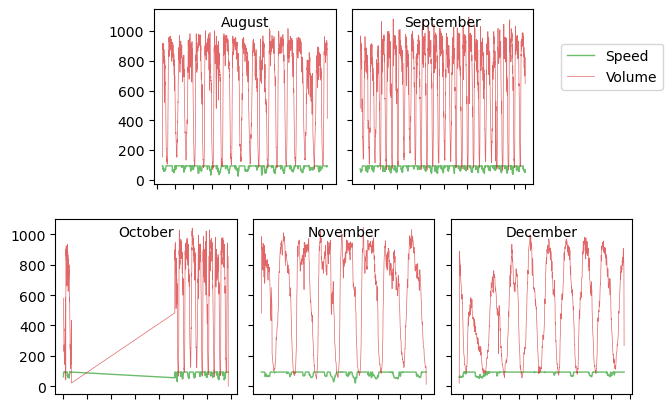

In [61]:
fig = plt.figure(figsize=(10, 5))
spec = gridspec.GridSpec(ncols=8, nrows=2, figure=fig)

aug_ax = fig.add_subplot(spec[0, 2:4])
plt.setp(aug_ax.get_xticklabels(), visible=False)

sep_ax = fig.add_subplot(spec[0, 4:6], sharey=aug_ax)
plt.setp(sep_ax.get_xticklabels(), visible=False)
plt.setp(sep_ax.get_yticklabels(), visible=False)

oct_ax = fig.add_subplot(spec[1, 1:3])
plt.setp(oct_ax.get_xticklabels(), visible=False)

nov_ax = fig.add_subplot(spec[1, 3:5], sharey=oct_ax)
plt.setp(nov_ax.get_xticklabels(), visible=False)
plt.setp(nov_ax.get_yticklabels(), visible=False)

dec_ax = fig.add_subplot(spec[1, 5:7], sharey=oct_ax)
plt.setp(dec_ax.get_xticklabels(), visible=False)
plt.setp(dec_ax.get_yticklabels(), visible=False)

aug_ax.set_title("August", pad=-12, fontsize=10)
aug_ax.plot(gardiner_ebnd_aug["datetime_bin"], gardiner_ebnd_aug["currentSpeed"], linewidth=1, label="Speed",
            color="tab:green",
            alpha=0.7)
aug_ax.plot(gardiner_mean_aug["datetime_bin"], gardiner_mean_aug["volume_15min"], linewidth=0.5, label="Volume",
            color="tab:red",
            alpha=0.7)

sep_ax.set_title("September", pad=-12, fontsize=10)
sep_ax.plot(gardiner_ebnd_sep["datetime_bin"], gardiner_ebnd_sep["currentSpeed"], linewidth=1, label="Speed",
            color="tab:green",
            alpha=0.7)
sep_ax.plot(gardiner_mean_sep["datetime_bin"], gardiner_mean_sep["volume_15min"], linewidth=0.5, label="Volume",
            color="tab:red",
            alpha=0.7)
sep_ax.legend(loc="lower right", bbox_to_anchor=(1.75, 0.5))

oct_ax.set_title("October", pad=-12, fontsize=10)
oct_ax.plot(gardiner_ebnd_oct["datetime_bin"], gardiner_ebnd_oct["currentSpeed"], linewidth=1, label="Speed",
            color="tab:green",
            alpha=0.7)
oct_ax.plot(gardiner_mean_oct["datetime_bin"], gardiner_mean_oct["volume_15min"], linewidth=0.5, label="Volume",
            color="tab:red",
            alpha=0.7)

nov_ax.set_title("November", pad=-12, fontsize=10)
nov_ax.plot(gardiner_ebnd_nov["datetime_bin"], gardiner_ebnd_nov["currentSpeed"], linewidth=1, label="Speed",
            color="tab:green",
            alpha=0.7)
nov_ax.plot(gardiner_mean_nov["datetime_bin"], gardiner_mean_nov["volume_15min"], linewidth=0.5, label="Volume",
            color="tab:red",
            alpha=0.7)

dec_ax.set_title("December", pad=-12, fontsize=10)
dec_ax.plot(gardiner_ebnd_dec["datetime_bin"], gardiner_ebnd_dec["currentSpeed"], linewidth=1, label="Speed",
            color="tab:green",
            alpha=0.7)
dec_ax.plot(gardiner_mean_dec["datetime_bin"], gardiner_mean_dec["volume_15min"], linewidth=0.5, label="Volume",
            color="tab:red",
            alpha=0.7)

plt.savefig("../../img/010_gardiner_volume_current_speed.eps", format="eps", bbox_inches="tight")
plt.savefig("../../img/010_gardiner_volume_current_speed.png", bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


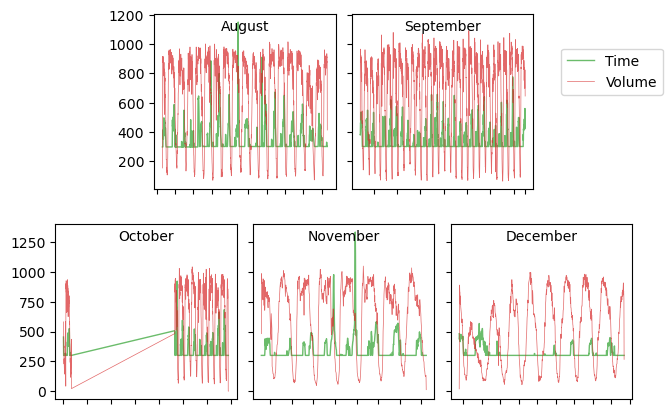

In [62]:
fig = plt.figure(figsize=(10, 5))
spec = gridspec.GridSpec(ncols=8, nrows=2, figure=fig)

aug_ax = fig.add_subplot(spec[0, 2:4])
plt.setp(aug_ax.get_xticklabels(), visible=False)

sep_ax = fig.add_subplot(spec[0, 4:6], sharey=aug_ax)
plt.setp(sep_ax.get_xticklabels(), visible=False)
plt.setp(sep_ax.get_yticklabels(), visible=False)

oct_ax = fig.add_subplot(spec[1, 1:3])
plt.setp(oct_ax.get_xticklabels(), visible=False)

nov_ax = fig.add_subplot(spec[1, 3:5], sharey=oct_ax)
plt.setp(nov_ax.get_xticklabels(), visible=False)
plt.setp(nov_ax.get_yticklabels(), visible=False)

dec_ax = fig.add_subplot(spec[1, 5:7], sharey=oct_ax)
plt.setp(dec_ax.get_xticklabels(), visible=False)
plt.setp(dec_ax.get_yticklabels(), visible=False)

aug_ax.set_title("August", pad=-12, fontsize=10)
aug_ax.plot(gardiner_ebnd_aug["datetime_bin"], gardiner_ebnd_aug["currentTravelTime"], linewidth=1, label="Time",
            color="tab:green",
            alpha=0.7)
aug_ax.plot(gardiner_mean_aug["datetime_bin"], gardiner_mean_aug["volume_15min"], linewidth=0.5, label="Volume",
            color="tab:red",
            alpha=0.7)

sep_ax.set_title("September", pad=-12, fontsize=10)
sep_ax.plot(gardiner_ebnd_sep["datetime_bin"], gardiner_ebnd_sep["currentTravelTime"], linewidth=1, label="Time",
            color="tab:green",
            alpha=0.7)
sep_ax.plot(gardiner_mean_sep["datetime_bin"], gardiner_mean_sep["volume_15min"], linewidth=0.5, label="Volume",
            color="tab:red",
            alpha=0.7)
sep_ax.legend(loc="lower right", bbox_to_anchor=(1.75, 0.5))

oct_ax.set_title("October", pad=-12, fontsize=10)
oct_ax.plot(gardiner_ebnd_oct["datetime_bin"], gardiner_ebnd_oct["currentTravelTime"], linewidth=1, label="Time",
            color="tab:green",
            alpha=0.7)
oct_ax.plot(gardiner_mean_oct["datetime_bin"], gardiner_mean_oct["volume_15min"], linewidth=0.5, label="Volume",
            color="tab:red",
            alpha=0.7)

nov_ax.set_title("November", pad=-12, fontsize=10)
nov_ax.plot(gardiner_ebnd_nov["datetime_bin"], gardiner_ebnd_nov["currentTravelTime"], linewidth=1, label="Time",
            color="tab:green",
            alpha=0.7)
nov_ax.plot(gardiner_mean_nov["datetime_bin"], gardiner_mean_nov["volume_15min"], linewidth=0.5, label="Volume",
            color="tab:red",
            alpha=0.7)

dec_ax.set_title("December", pad=-12, fontsize=10)
dec_ax.plot(gardiner_ebnd_dec["datetime_bin"], gardiner_ebnd_dec["currentTravelTime"], linewidth=1, label="Time",
            color="tab:green",
            alpha=0.7)
dec_ax.plot(gardiner_mean_dec["datetime_bin"], gardiner_mean_dec["volume_15min"], linewidth=0.5, label="Volume",
            color="tab:red",
            alpha=0.7)

plt.savefig("../../img/010_gardiner_volume_current_travel_time.eps", format="eps", bbox_inches="tight")
plt.savefig("../../img/010_gardiner_volume_current_travel_time.png", bbox_inches="tight")

In [63]:
gardiner_sample = gardiner_df.sample(1)
gardiner_sample = gardiner_df[(gardiner_df["datetime_bin"].dt.day.isin(gardiner_sample["datetime_bin"].dt.day)) & (
    gardiner_df["datetime_bin"].dt.month.isin(gardiner_sample["datetime_bin"].dt.month))]
gardiner_sample = gardiner_sample.sort_values(by="datetime_bin")

In [64]:
gardiner_sample

,datetime_bin,volume_15min,latitude,longitude,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,coordinates,visibility,temperature,humidity,windSpeed,windDegree,rain1h,snow1h,weather,cloudsAll,E,W
5988,2022-09-16 00:00:00+00:00,465,43.638046,-79.396634,78.000000,92.000000,358.333333,303.666667,"[{'latitude': 43.681009250673604, 'longitude':...",10000.0,15.716667,65.000000,2.060000,180.000000,0.0,0.0,800,0,0,1
5989,2022-09-16 00:00:00+00:00,416,43.637929,-79.396597,78.000000,92.000000,358.333333,303.666667,"[{'latitude': 43.681009250673604, 'longitude':...",10000.0,15.716667,65.000000,2.060000,180.000000,0.0,0.0,800,0,1,0
5990,2022-09-16 00:15:00+00:00,411,43.638046,-79.396634,90.333333,92.666667,309.666667,301.333333,"[{'latitude': 43.681009250673604, 'longitude':...",10000.0,15.230000,68.666667,0.983333,57.000000,0.0,0.0,804,92,0,1
5991,2022-09-16 00:15:00+00:00,397,43.637929,-79.396597,90.333333,92.666667,309.666667,301.333333,"[{'latitude': 43.681009250673604, 'longitude':...",10000.0,15.230000,68.666667,0.983333,57.000000,0.0,0.0,804,92,1,0
5992,2022-09-16 00:30:00+00:00,329,43.638046,-79.396634,82.666667,92.333333,340.333333,302.666667,"[{'latitude': 43.681009250673604, 'longitude':...",10000.0,15.283333,68.000000,1.030000,0.000000,0.0,0.0,800,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,2022-09-16 23:15:00+00:00,598,43.637929,-79.396597,60.666667,92.000000,461.000000,304.000000,"[{'latitude': 43.681009250673604, 'longitude':...",10000.0,17.766667,84.000000,8.830000,65.333333,0.0,0.0,804,96,1,0
6176,2022-09-16 23:30:00+00:00,536,43.638046,-79.396634,75.666667,92.333333,371.000000,302.666667,"[{'latitude': 43.681009250673604, 'longitude':...",10000.0,17.753333,84.000000,12.350000,60.000000,0.0,0.0,803,75,0,1
6177,2022-09-16 23:30:00+00:00,519,43.637929,-79.396597,75.666667,92.333333,371.000000,302.666667,"[{'latitude': 43.681009250673604, 'longitude':...",10000.0,17.753333,84.000000,12.350000,60.000000,0.0,0.0,803,75,1,0
6178,2022-09-16 23:45:00+00:00,388,43.638046,-79.396634,89.000000,92.666667,315.000000,301.333333,"[{'latitude': 43.681009250673604, 'longitude':...",10000.0,17.650000,84.000000,12.350000,60.000000,0.0,0.0,803,75,0,1


In [65]:
sample_ebnd = gardiner_sample[gardiner_sample["E"] == 1]
sample_wbnd = gardiner_sample[gardiner_sample["W"] == 1]
sample_mean = gardiner_sample.groupby("datetime_bin").mean().reset_index()

In [66]:
sample_ebnd["time"] = sample_ebnd["datetime_bin"].dt.strftime("%R")
sample_wbnd["time"] = sample_wbnd["datetime_bin"].dt.strftime("%R")
sample_mean["time"] = sample_mean["datetime_bin"].dt.strftime("%R")

C:\Users\felip\AppData\Local\Temp\ipykernel_17152\3092918061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_ebnd["time"] = sample_ebnd["datetime_bin"].dt.strftime("%R")
C:\Users\felip\AppData\Local\Temp\ipykernel_17152\3092918061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_wbnd["time"] = sample_wbnd["datetime_bin"].dt.strftime("%R")


In [67]:
import numpy as np

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


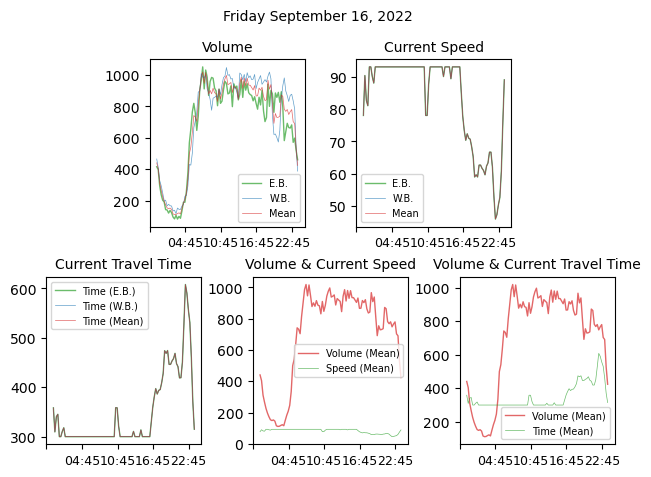

In [78]:
# generate similar previous plots to sample data
# volumes, current speed, current travel time, volume X current speed, volume X current travel time
xticks_step = 24
fig = plt.figure(figsize=(10, 5))
spec = gridspec.GridSpec(ncols=8, nrows=2, figure=fig)
spec.update(wspace=1, hspace=0.3)

fig.suptitle(sample_ebnd["datetime_bin"].dt.strftime("%A %B %d, %Y").tolist()[0], size="medium")

vol_ax = fig.add_subplot(spec[0, 2:4])
cur_spd_ax = fig.add_subplot(spec[0, 4:6])
cur_tra_tim_ax = fig.add_subplot(spec[1, 1:3])
vol_spd_ax = fig.add_subplot(spec[1, 3:5])
vol_tim_ax = fig.add_subplot(spec[1, 5:7])

vol_ax.set_title("Volume", fontsize=10)
vol_ax.plot(sample_ebnd["time"], sample_ebnd["volume_15min"], linewidth=1, label="E.B.",
            color="tab:green",
            alpha=0.7)
vol_ax.plot(sample_wbnd["time"], sample_wbnd["volume_15min"], linewidth=0.5, label="W.B.",
            color="tab:blue",
            alpha=0.7)
vol_ax.plot(sample_mean["time"], sample_mean["volume_15min"], linewidth=0.5, label="Mean",
            color="tab:red",
            alpha=0.7)
vol_ax_start, vol_ax_end = vol_ax.get_xlim()
vol_ax.set_xticks(np.arange(vol_ax_start, vol_ax_end, xticks_step))
vol_ax.tick_params(axis="x", labelsize=9)
vol_ax.legend(prop={"size": 7})

cur_spd_ax.set_title("Current Speed", fontsize=10)
cur_spd_ax.plot(sample_ebnd["time"], sample_ebnd["currentSpeed"], linewidth=1, label="E.B.",
                color="tab:green",
                alpha=0.7)
cur_spd_ax.plot(sample_wbnd["time"], sample_wbnd["currentSpeed"], linewidth=0.5, label="W.B.",
                color="tab:blue",
                alpha=0.7)
cur_spd_ax.plot(sample_mean["time"], sample_mean["currentSpeed"], linewidth=0.5, label="Mean",
                color="tab:red",
                alpha=0.7)
cur_spd_ax_start, cur_spd_ax_end = cur_spd_ax.get_xlim()
cur_spd_ax.set_xticks(np.arange(cur_spd_ax_start, cur_spd_ax_end, xticks_step))
cur_spd_ax.tick_params(axis="x", labelsize=9)
cur_spd_ax.legend(prop={"size": 7})

cur_tra_tim_ax.set_title("Current Travel Time", fontsize=10)
cur_tra_tim_ax.plot(sample_ebnd["time"], sample_ebnd["currentTravelTime"], linewidth=1, label="Time (E.B.)",
                    color="tab:green",
                    alpha=0.7)
cur_tra_tim_ax.plot(sample_wbnd["time"], sample_wbnd["currentTravelTime"], linewidth=0.5, label="Time (W.B.)",
                    color="tab:blue",
                    alpha=0.7)

cur_tra_tim_ax.plot(sample_mean["time"], sample_mean["currentTravelTime"], linewidth=0.5, label="Time (Mean)",
                    color="tab:red",
                    alpha=0.7)
cur_tra_tim_ax_start, cur_tra_tim_ax_end = cur_tra_tim_ax.get_xlim()
cur_tra_tim_ax.set_xticks(np.arange(cur_tra_tim_ax_start, cur_tra_tim_ax_end, xticks_step))
cur_tra_tim_ax.tick_params(axis="x", labelsize=9)
cur_tra_tim_ax.legend(prop={"size": 7})

vol_spd_ax.set_title("Volume & Current Speed", fontsize=10)
vol_spd_ax.plot(sample_mean["time"], sample_mean["volume_15min"], linewidth=1, label="Volume (Mean)",
                color="tab:red",
                alpha=0.7)
vol_spd_ax.plot(sample_mean["time"], sample_mean["currentSpeed"], linewidth=0.5, label="Speed (Mean)",
                color="tab:green",
                alpha=0.7)
vol_spd_ax_start, vol_spd_ax_end = vol_spd_ax.get_xlim()
vol_spd_ax.set_xticks(np.arange(vol_spd_ax_start, vol_spd_ax_end, xticks_step))
vol_spd_ax.tick_params(axis="x", labelsize=9)
vol_spd_ax.legend(prop={"size": 7})

vol_tim_ax.set_title("Volume & Current Travel Time", fontsize=10)
vol_tim_ax.plot(sample_mean["time"], sample_mean["volume_15min"], linewidth=1, label="Volume (Mean)",
                color="tab:red",
                alpha=0.7)
vol_tim_ax.plot(sample_mean["time"], sample_mean["currentTravelTime"], linewidth=0.5, label="Time (Mean)",
                color="tab:green",
                alpha=0.7)
vol_tim_ax_start, vol_tim_ax_end = vol_tim_ax.get_xlim()
vol_tim_ax.set_xticks(np.arange(vol_tim_ax_start, vol_tim_ax_end, xticks_step))
vol_tim_ax.tick_params(axis="x", labelsize=9)
vol_tim_ax.legend(prop={"size": 7})

plt.savefig("../../img/010_gardiner_sample_mean_plots.eps", format="eps", bbox_inches="tight")
plt.savefig("../../img/010_gardiner_sample_mean_plots.png", bbox_inches="tight")

# plot stats and weather
| code | main         | description                  |
|------|--------------|------------------------------|
| 202  | Thunderstorm | thunderstorm with heavy rain |
| 211  | Thunderstorm | thunderstorm                 |
| 500  | Rain         | light rain                   |
| 501  | Rain         | moderate rain                |
| 502  | Rain         | heavy intensity rain         |
| 520  | Rain         | light intensity shower rain  |
| 600  | Snow         | light snow                   |
| 601  | Snow         | snow                         |
| 701  | Mist         | mist                         |
| 721  | Haze         | haze                         |
| 741  | Fog          | fog                          |
| 800  | Clear        | clear sky                    |
| 801  | Clouds       | few clouds: 11-25%           |
| 802  | Clouds       | scattered clouds: 25-50%     |
| 803  | Clouds       | broken clouds: 51-84%        |

In [79]:
gardiner_thunderstorm = gardiner_df[gardiner_df["weather"].isin([202, 211])]
gardiner_rain = gardiner_df[gardiner_df["weather"].isin([500, 501, 502, 520])]
gardiner_snow = gardiner_df[gardiner_df["weather"].isin([600, 601])]
gardiner_mist = gardiner_df[gardiner_df["weather"].isin([701, 721, 741])]
gardiner_clear = gardiner_df[gardiner_df["weather"].isin([800])]
gardiner_fog = gardiner_df[gardiner_df["weather"].isin([801, 801, 802, 803])]

In [80]:
gardiner_thunderstorm["rain1h10e-3"] = gardiner_thunderstorm["rain1h"].apply(lambda x: x * 1000)
gardiner_rain["rain1h10e-3"] = gardiner_rain["rain1h"].apply(lambda x: x * 1000)
gardiner_snow["snow1h10e-3"] = gardiner_snow["snow1h"].apply(lambda x: x * 1000)

C:\Users\felip\AppData\Local\Temp\ipykernel_17152\924566282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gardiner_thunderstorm["rain1h10e-3"] = gardiner_thunderstorm["rain1h"].apply(lambda x: x * 1000)
C:\Users\felip\AppData\Local\Temp\ipykernel_17152\924566282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gardiner_rain["rain1h10e-3"] = gardiner_rain["rain1h"].apply(lambda x: x * 1000)
C:\Users\felip\AppData\Local\Temp\ipykernel_17152\924566282.py:3: SettingWithCopyWarning: 
A value is trying t

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


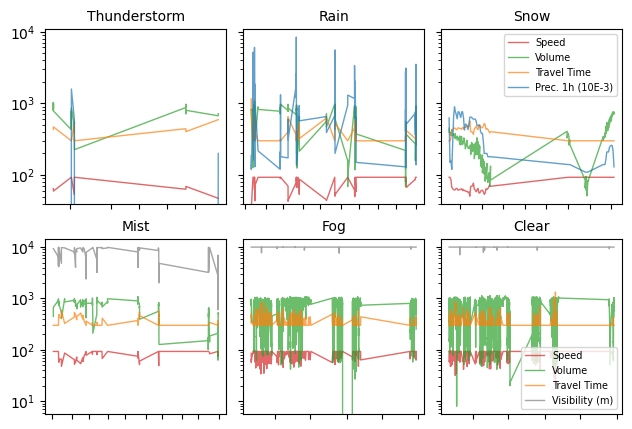

In [81]:
# speed, volume per weather condition
fig = plt.figure(figsize=(10, 5))
spec = gridspec.GridSpec(ncols=8, nrows=2, figure=fig)

thunderstorm_ax = fig.add_subplot(spec[0, 1:3])
plt.setp(thunderstorm_ax.get_xticklabels(), visible=False)

rain_ax = fig.add_subplot(spec[0, 3:5], sharey=thunderstorm_ax)
plt.setp(rain_ax.get_xticklabels(), visible=False)
plt.setp(rain_ax.get_yticklabels(), visible=False)

snow_ax = fig.add_subplot(spec[0, 5:7], sharey=thunderstorm_ax)
plt.setp(snow_ax.get_xticklabels(), visible=False)
plt.setp(snow_ax.get_yticklabels(), visible=False)

mist_ax = fig.add_subplot(spec[1, 1:3])
plt.setp(mist_ax.get_xticklabels(), visible=False)

fog_ax = fig.add_subplot(spec[1, 3:5], sharey=mist_ax)
plt.setp(fog_ax.get_xticklabels(), visible=False)
plt.setp(fog_ax.get_yticklabels(), visible=False)

clear_ax = fig.add_subplot(spec[1, 5:7], sharey=mist_ax)
plt.setp(clear_ax.get_xticklabels(), visible=False)
plt.setp(clear_ax.get_yticklabels(), visible=False)

thunderstorm_ax.set_title("Thunderstorm", fontsize=10)
thunderstorm_ax.plot(gardiner_thunderstorm["datetime_bin"], gardiner_thunderstorm["currentSpeed"], linewidth=1,
                     label="Speed",
                     color="tab:red",
                     alpha=0.7)
thunderstorm_ax.plot(gardiner_thunderstorm["datetime_bin"], gardiner_thunderstorm["volume_15min"], linewidth=1,
                     label="Volume",
                     color="tab:green",
                     alpha=0.7)
thunderstorm_ax.plot(gardiner_thunderstorm["datetime_bin"], gardiner_thunderstorm["currentTravelTime"], linewidth=1,
                     label="Travel Time",
                     color="tab:orange",
                     alpha=0.7)
thunderstorm_ax.plot(gardiner_thunderstorm["datetime_bin"], gardiner_thunderstorm["rain1h10e-3"], linewidth=1,
                     label="Prec. 1h (10E-3)",
                     color="tab:blue",
                     alpha=0.7)
thunderstorm_ax.set_yscale("log")

rain_ax.set_title("Rain", fontsize=10)
rain_ax.plot(gardiner_rain["datetime_bin"], gardiner_rain["currentSpeed"], linewidth=1, label="Speed",
             color="tab:red",
             alpha=0.7)
rain_ax.plot(gardiner_rain["datetime_bin"], gardiner_rain["volume_15min"], linewidth=1, label="Volume",
             color="tab:green",
             alpha=0.7)
rain_ax.plot(gardiner_rain["datetime_bin"], gardiner_rain["currentTravelTime"], linewidth=1,
             label="Travel Time",
             color="tab:orange",
             alpha=0.7)
rain_ax.plot(gardiner_rain["datetime_bin"], gardiner_rain["rain1h10e-3"], linewidth=1, label="Prec. 1h (10E-3)",
             color="tab:blue",
             alpha=0.7)
rain_ax.set_yscale("log")

snow_ax.set_title("Snow", fontsize=10)
snow_ax.plot(gardiner_snow["datetime_bin"], gardiner_snow["currentSpeed"], linewidth=1, label="Speed",
             color="tab:red",
             alpha=0.7)
snow_ax.plot(gardiner_snow["datetime_bin"], gardiner_snow["volume_15min"], linewidth=1, label="Volume",
             color="tab:green",
             alpha=0.7)
snow_ax.plot(gardiner_snow["datetime_bin"], gardiner_snow["currentTravelTime"], linewidth=1,
             label="Travel Time",
             color="tab:orange",
             alpha=0.7)
snow_ax.plot(gardiner_snow["datetime_bin"], gardiner_snow["snow1h10e-3"], linewidth=1, label="Prec. 1h (10E-3)",
             color="tab:blue",
             alpha=0.7)
snow_ax.set_yscale("log")
snow_ax.legend(prop={"size": 7})

mist_ax.set_title("Mist", fontsize=10)
mist_ax.plot(gardiner_mist["datetime_bin"], gardiner_mist["currentSpeed"], linewidth=1, label="Speed",
             color="tab:red",
             alpha=0.7)
mist_ax.plot(gardiner_mist["datetime_bin"], gardiner_mist["volume_15min"], linewidth=1, label="Volume",
             color="tab:green",
             alpha=0.7)
mist_ax.plot(gardiner_mist["datetime_bin"], gardiner_mist["currentTravelTime"], linewidth=1,
             label="Travel Time",
             color="tab:orange",
             alpha=0.7)
mist_ax.plot(gardiner_mist["datetime_bin"], gardiner_mist["visibility"], linewidth=1, label="Visibility (m)",
             color="tab:gray",
             alpha=0.7)
mist_ax.set_yscale("log")

fog_ax.set_title("Fog", fontsize=10)
fog_ax.plot(gardiner_fog["datetime_bin"], gardiner_fog["currentSpeed"], linewidth=1, label="Speed",
            color="tab:red",
            alpha=0.7)
fog_ax.plot(gardiner_fog["datetime_bin"], gardiner_fog["volume_15min"], linewidth=1, label="Volume",
            color="tab:green",
            alpha=0.7)
fog_ax.plot(gardiner_fog["datetime_bin"], gardiner_fog["currentTravelTime"], linewidth=1,
            label="Travel Time",
            color="tab:orange",
            alpha=0.7)
fog_ax.plot(gardiner_fog["datetime_bin"], gardiner_fog["visibility"], linewidth=1, label="Visibility (m)",
            color="tab:gray",
            alpha=0.7)
fog_ax.set_yscale("log")

clear_ax.set_title("Clear", fontsize=10)
clear_ax.plot(gardiner_clear["datetime_bin"], gardiner_clear["currentSpeed"], linewidth=1, label="Speed",
              color="tab:red",
              alpha=0.7)
clear_ax.plot(gardiner_clear["datetime_bin"], gardiner_clear["volume_15min"], linewidth=1, label="Volume",
              color="tab:green",
              alpha=0.7)
clear_ax.plot(gardiner_clear["datetime_bin"], gardiner_clear["currentTravelTime"], linewidth=1,
              label="Travel Time",
              color="tab:orange",
              alpha=0.7)
clear_ax.plot(gardiner_clear["datetime_bin"], gardiner_clear["visibility"], linewidth=1, label="Visibility (m)",
              color="tab:gray",
              alpha=0.7)
clear_ax.set_yscale("log")
clear_ax.legend(prop={"size": 7})

plt.savefig("../../img/010_gardiner_weather_speed_volume_time.eps", format="eps", bbox_inches="tight")
plt.savefig("../../img/010_gardiner_weather_speed_volume_time.png", bbox_inches="tight")

In [82]:
from scipy import stats

In [83]:
mean_vol = gardiner_mean_aug["volume_15min"]
mean_spd = gardiner_mean_aug["currentSpeed"]
mean_tim = gardiner_mean_aug["currentTravelTime"]

In [84]:
corr_vol_spd = stats.pearsonr(mean_vol, mean_spd)
corr_vol_travel_time = stats.pearsonr(mean_vol, mean_tim)
corr_spd_travel_time = stats.pearsonr(mean_spd, mean_tim)

In [85]:
print("Pearson Coef:", corr_vol_spd.statistic)
print("P-value:", corr_vol_spd.pvalue)
print("Confidence interval:", f"[{corr_vol_spd.confidence_interval().low},{corr_vol_spd.confidence_interval().high}]")

Pearson Coef: -0.20295159062990847
P-value: 2.1644202367826713e-17
Confidence interval: [-0.24791691750338268,-0.15711371062152066]


The cell above shows that there is a tendency of speed decreasing as volume increases

In [86]:
print("Pearson Coef:", corr_vol_travel_time.statistic)
print("P-value:", corr_vol_travel_time.pvalue)
print("Confidence interval:",
      f"[{corr_vol_spd.confidence_interval().low},{corr_vol_travel_time.confidence_interval().high}]")

Pearson Coef: 0.18156185256503693
P-value: 3.6106946879804777e-14
Confidence interval: [-0.24791691750338268,0.22695842827594853]


The cell above shows that there is a tendency of travel time increasing as volume increases

In [87]:
print("Pearson Coef:", corr_spd_travel_time.statistic)
print("P-value:", corr_spd_travel_time.pvalue)
print("Confidence interval:",
      f"[{corr_spd_travel_time.confidence_interval().low},{corr_spd_travel_time.confidence_interval().high}]")

Pearson Coef: -0.9531345866932781
P-value: 0.0
Confidence interval: [-0.9572813867962544,-0.9485958185067819]


The cell above shows that there is a strong inverse relationship between speed and travel time. This means that as speed increases, travel time decreases